# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

**You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature(degC)**

# TASK #2: DATA EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IceCreamData.csv')

In [3]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
df.duplicated().sum()

0

# TASK #3: PERFORM DATA VISUALIZATION

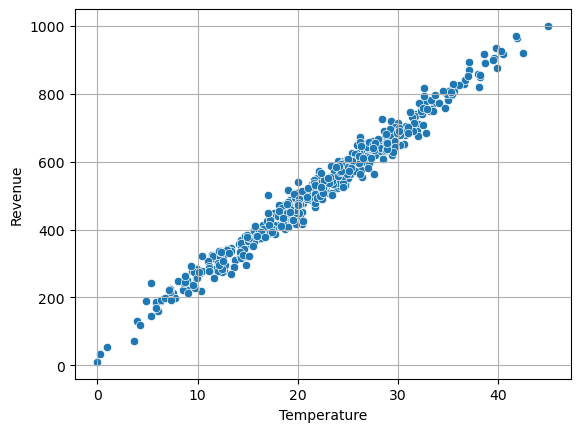

In [7]:
sns.scatterplot(x=df['Temperature'],y=df['Revenue'])
plt.grid()

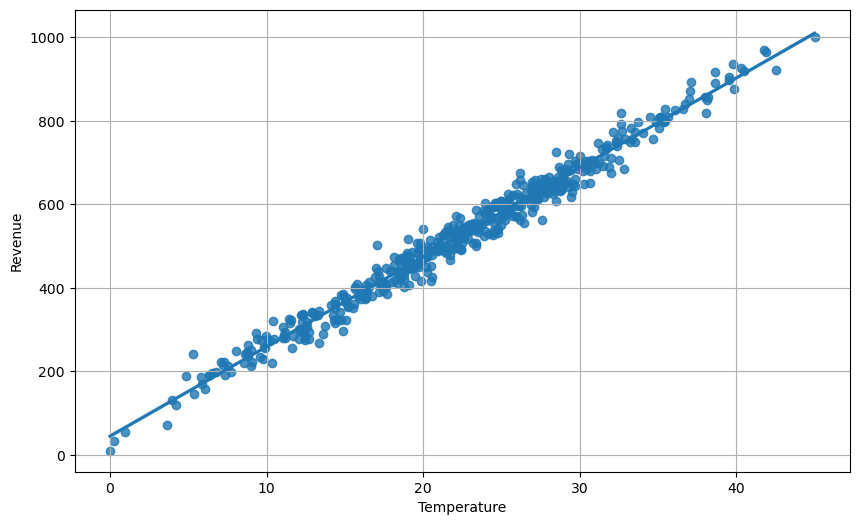

In [8]:
plt.figure(figsize=(10,6))
sns.regplot(x='Temperature',y='Revenue',data=df)
plt.grid()

# TASK #4: CREATE TESTING AND TRAINING DATASET

In [9]:
# X = df[['Temperature']]  # Feature: 'Temperature' should be a DataFrame
# y = df['Revenue']        # Target: 'Revenue' should be a Series

In [10]:
from sklearn.model_selection import train_test_split
X = np.array(df['Temperature']).reshape(-1,1)  
y = df['Revenue']                            

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [11]:
X_train.shape

(400, 1)

# TASK #5: UNDERSTAND THEORY BEHIND SIMPLE LINER REGRESSION 

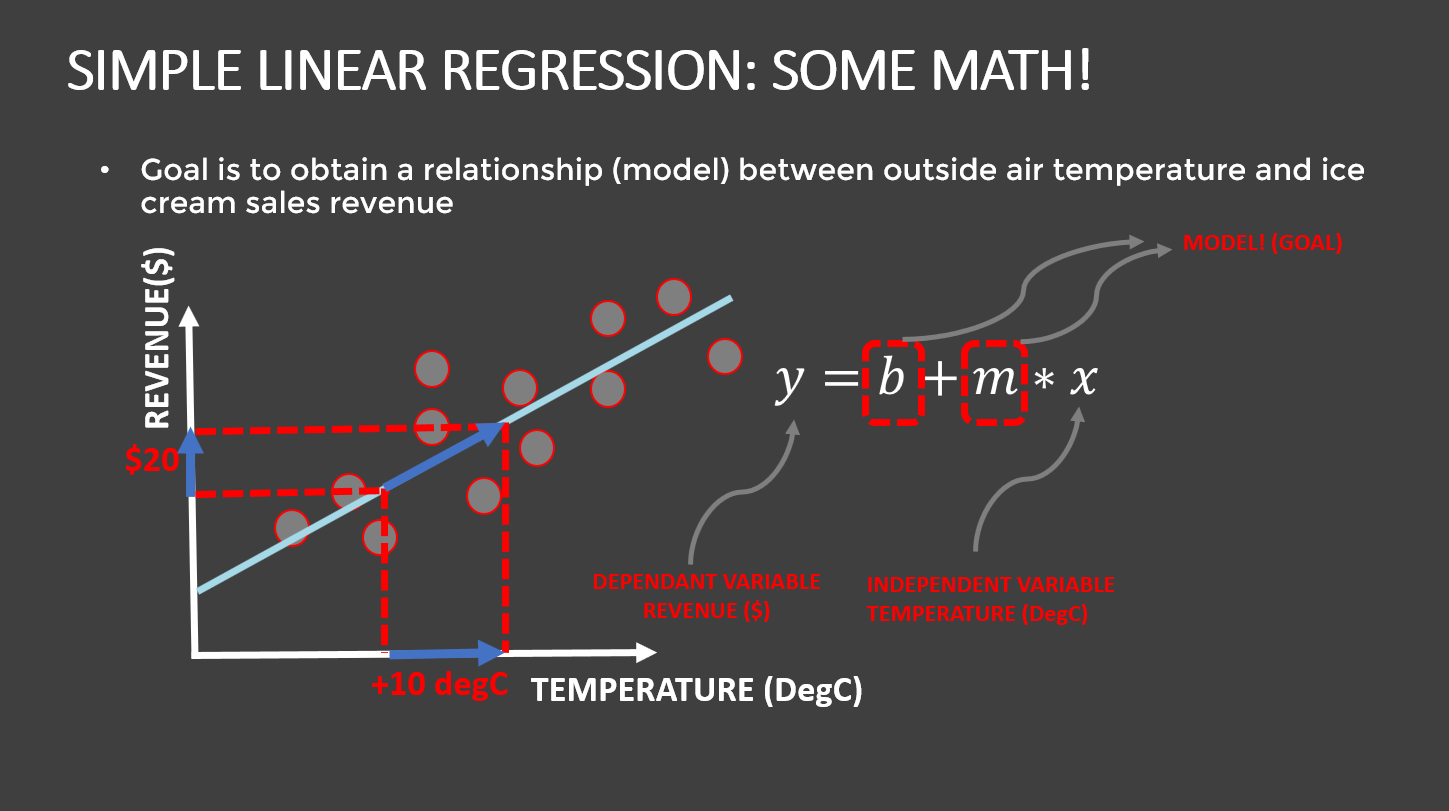

# TASK #6: TRAIN A SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # Default, fit_intercept=True i.e computes 'b'
# model = LinearRegression(fit_intercept=False)  # Forces 'b' to be 0, No Intercept in case of Mean-Centered Data Only.

model.fit(X_train,y_train)

LinearRegression()

In [13]:
print('Linear Model Coeff(m)', model.coef_) # m/slope
print('Linear Model Coeff(b)', model.intercept_)

Linear Model Coeff(m) [21.37180458]
Linear Model Coeff(b) 46.856892135537464


# TASK #7: EVALUATE TRAINED SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Compute errors
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE)  : {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 588.71
Root Mean Squared Error (RMSE): 24.26
Mean Absolute Error (MAE)  : 19.29
R² Score: 0.98


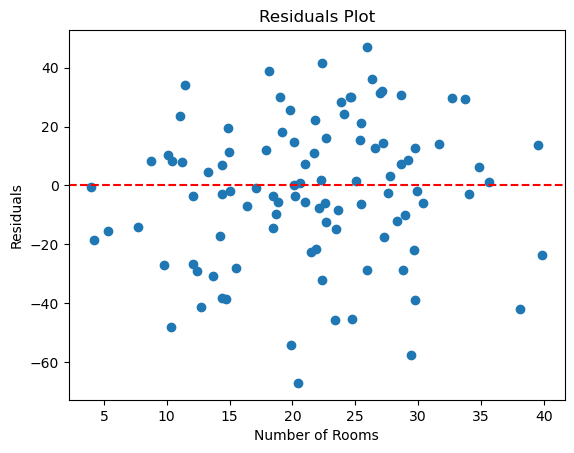

In [16]:
# Calculate residuals (errors)
residuals = y_test - y_pred

plt.scatter(X_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Number of Rooms")
plt.ylabel("Residuals")
plt.show()

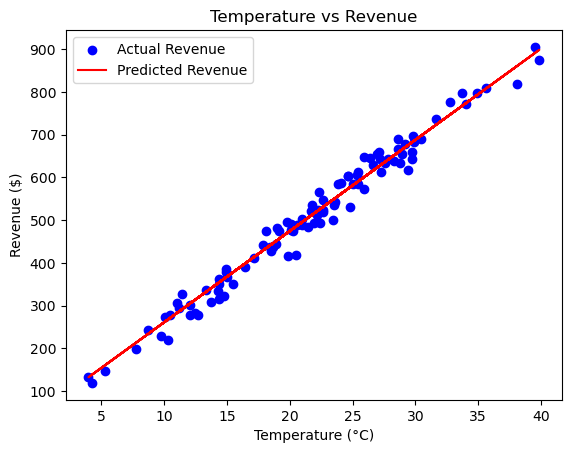

In [17]:
plt.scatter(X_test, y_test, color='blue', label='Actual Revenue')
plt.plot(X_test, y_pred, color='red', label='Predicted Revenue')
plt.title("Temperature vs Revenue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()

In [18]:
accuracy = model.score(X_test,y_test)
accuracy

0.9798192680454444

# Use the trained model to generate predictions

In [19]:
# Temp= pd.DataFrame([[25]], columns=['Temperature']) 

Temp = np.array([40])
Temp = Temp.reshape(-1,1)

Revenue = model.predict(Temp)
print('Revenue Predictions =', Revenue)


Revenue Predictions = [901.72907528]
